# 4.9: Visualization Part 2

## Contents:
1. Importing data
2. Day of week bar chart
3. Prices histogram
4. Prices scatterplot
5. Prices line chart
6. Hour histogram
7. Product analysis
8. Loyalty bar chart
9. Hour line chart
10. Age/ dependents line chart
11. Age/ income scatterplot

### 1. Importing data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path for data import

path = r'C:\Users\scott\Desktop\Data Analysis\CF Immersive\Python\Jan-2022 Instacart Basket Analysis'

In [3]:
# importing merged orders/products/customers dataframe

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_all.pkl'))

### 2. Day of week bar chart

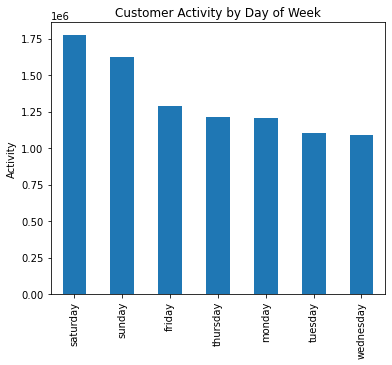

In [10]:
# creating day of week bar chart

bar_days = df['orders_day_of_week'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Customer Activity by Day of Week', ylabel='Activity', xlabel='', figsize=(6,5))

In [5]:
# Exporting bar_days as picture

bar_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 3. Prices histogram

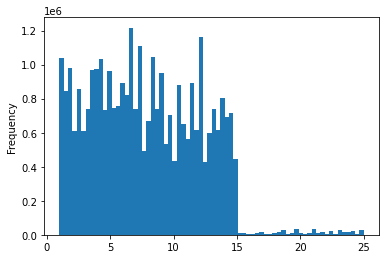

In [6]:
# Creating prices histogram

hist_prices = df['prices'].plot.hist(bins = 70)

In [7]:
# Exporting prices histogram as picture

hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### 4. Prices scatterplot

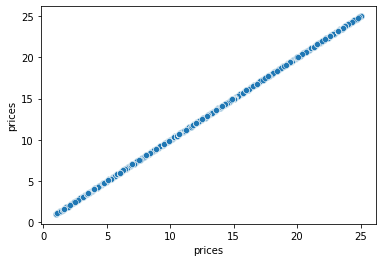

In [8]:
scatter_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [9]:
# Exporting prices scatterplot as picture

scatter_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'))

### 5. Prices line chart

#### Creating sample 

In [10]:
# Setting the random seed

np.random.seed(4)

In [11]:
# Creating random boolean list with 70% true and 30% false

dev = np.random.rand(len(df)) <= 0.7

In [12]:
# assigning true values to big dataframe

big = df[dev]

In [13]:
# assigning false values to small dataframe

small = df[~dev]

In [14]:
# checking length of df

len(df)

32404859

In [15]:
# checking length of big and small combined

len(big) + len(small)

32404859

In [16]:
# creating sample dataframe from small subset

df_2 = small[['orders_day_of_week', 'prices']]

#### Creating line chart

In [ ]:
# creating prices line chart over days of week

line_prices = sns.lineplot(data = df, x = 'orders_day_of_week', y = 'prices')

In [18]:
# Exporting prices line chart as picture

line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))

### 6. Hour of day

#### Histogram

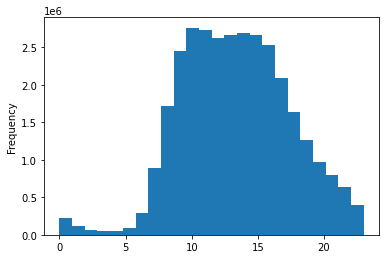

In [19]:
# Creating hour of day histogram

hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

#### This histogram shows that the majority of orders are placed during the middle of the day (0600 to 2000) with a peak around 0900.

In [20]:
# Exporting hour of day histogram as picture

hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hour.png'))

#### Bar chart

### 7. Product analysis

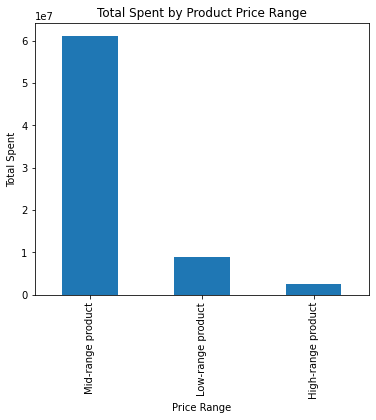

In [42]:
# creating hour of day bar chart

bar_days = df.groupby('price_range_loc')['prices'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Spent by Product Price Range', ylabel='Total Spent', xlabel='Price Range', figsize=(6,5))

<AxesSubplot:title={'center':'Number of Orders by Department'}, xlabel='Department', ylabel='Number of Orders'>

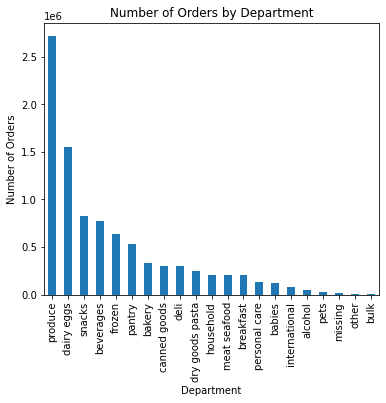

In [36]:
# bar chart of total spent by departments

df.groupby(['department_id'])['prices'].count().sort_values(ascending=False).plot(kind='bar', title='Number of Orders by Department', ylabel='Number of Orders', xlabel='Department', figsize=(6,5))

In [76]:
# changing order of index for descending sort on stacked bar chart below

dept_day_cross = pd.crosstab(df['department_id'], df['orders_day_of_week'], normalize='index').reindex(index = ['produce','dairy eggs','beverages','frozen','pantry','meat seafood','snacks','bakery','deli','canned goods','dry goods pasta','breakfast','household','personal care','international','alcohol','pets','missing','bulk','other'])

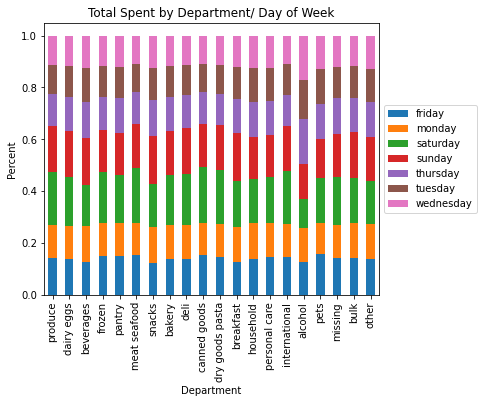

In [79]:
# stacked bar chart of total spent by departments and day of week

dept_day_cross.plot.bar(stacked=True, title='Total Spent by Department/ Day of Week', ylabel='Percent', xlabel='Department', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

In [30]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,Behavior_Profile,Demographic Profile
0,2539329,1,1,monday,8,NaN,196,1,0,Soda,77,beverages,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
2,473747,1,3,tuesday,12,21.0,196,1,1,Soda,77,beverages,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
3,2254736,1,4,wednesday,7,29.0,196,1,1,Soda,77,beverages,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
6,550135,1,7,sunday,9,20.0,196,1,1,Soda,77,beverages,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
10,2539329,1,1,monday,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,dairy eggs,12.5,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367796,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)


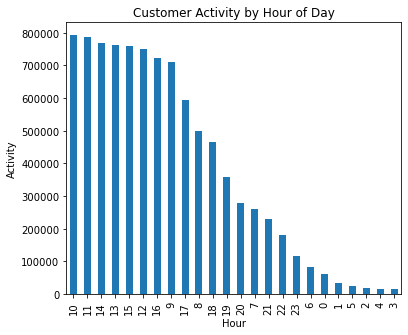

In [13]:
# creating hour of day bar chart

bar_days = df['order_hour_of_day'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Customer Activity by Hour of Day', ylabel='Activity', xlabel='Hour', figsize=(6,5))

### 8. Loyalty charts

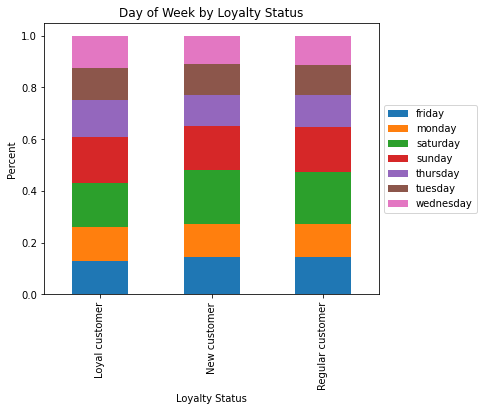

In [67]:
# creating loyalty vs hour of day stacked bar

pd.crosstab(df['loyalty_flag'],df['orders_day_of_week'], normalize='index').plot(kind='bar',stacked=True, title='Day of Week by Loyalty Status', ylabel='Percent', xlabel='Loyalty Status', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

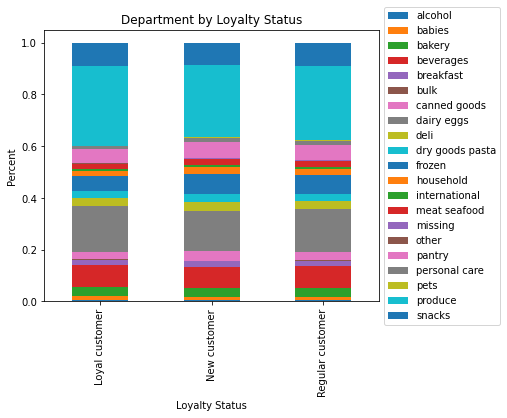

In [71]:
# creating loyalty vs department stacked bar

pd.crosstab(df['loyalty_flag'],df['department_id'], normalize='index').plot(kind='bar',stacked=True, title='Department by Loyalty Status', ylabel='Percent', xlabel='Loyalty Status', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

<AxesSubplot:title={'center':'Loyalty Status Distribution'}>

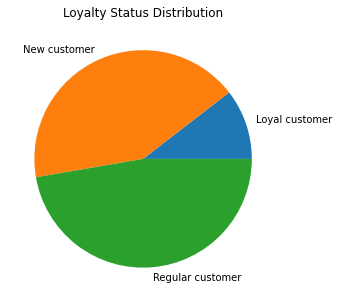

In [46]:
# creating loyalty total customers bar chart

df.groupby('loyalty_flag')['user_id'].nunique().plot(kind='pie', title='Loyalty Status Distribution', ylabel='', xlabel='', figsize=(6,5))

In [22]:
# Exporting loyalty bar chart as picture

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

### 9. Hour line chart

In [24]:
# creating sample dataframe from small subset

df_2 = df[['order_hour_of_day', 'prices']]

In [ ]:
# creating prices line chart over hours of day

line_prices_hour = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

<AxesSubplot:title={'center':'Total Spent by Hour of Day'}, xlabel='Hour', ylabel='Total Spent'>

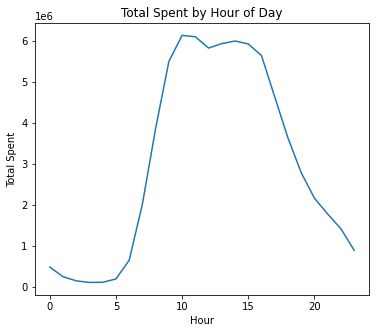

In [28]:
# creating hour of day line chart

df.groupby('order_hour_of_day')['prices'].sum().plot(kind='line', title='Total Spent by Hour of Day', ylabel='Total Spent', xlabel='Hour', figsize=(6,5))

In [29]:
# Exporting prices over hours line chart as picture

line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour.png'))

### 10. Age/ dependents line chart

In [36]:
# creating sample dataframe from small subset

df_4 = small[['Age', 'n_dependants']]

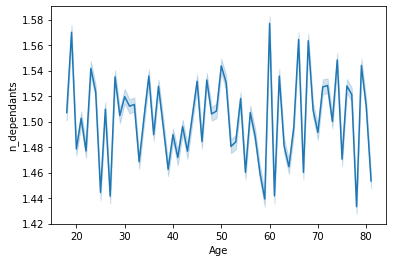

In [37]:
# creating dependents line chart over age

line_age_dependents = sns.lineplot(data = df_4, x = 'Age', y = 'n_dependants')

#### There is not a significant relationship between customer age and number of dependents

In [38]:
# Exporting age/ dependents line chart as picture

line_age_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents.png'))

### 11. Age/ income scatterplot

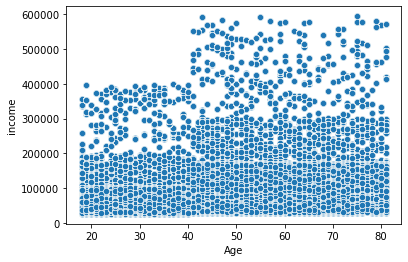

In [39]:
# Creating scatterplot of age and spending power

scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df)

#### Customers over the age of 40 tend to have higher incomes

In [42]:
# Exporting age/ income scatterplot as picture

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))